In [51]:
from pandas import Series
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier

from scipy.stats import randint

In [2]:
from jupyterthemes import jtplot
jtplot.style()

In [3]:
def get_boxplot(column):
    '''Makes a boxplot for the column'''
    fig, ax = plt.subplots(figsize = (6, 6))
    sns.boxplot(x='default', y=column, 
                data=train.loc[train.loc[:, column].isin(train.loc[:, column].value_counts().index[:])])
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
    
def roc_auc_curve(y_valid, y_pred_probs):
    '''ROC AUC Curve'''
    fpr, tpr, threshold = roc_curve(y_valid, y_pred_probs)
    roc_auc = roc_auc_score(y_valid, y_pred_probs)

    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label = 'Regression')
    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(15)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
5,41415,18FEB2014,SCH,M,27,Y,N,0,1,-2.032257,0,50,1,1,15000,2,3,N,0
6,28436,04FEB2014,SCH,M,39,N,N,0,0,-2.225004,0,60,1,2,28000,1,1,N,0
7,68769,17MAR2014,SCH,F,39,N,N,0,0,-1.522739,1,50,2,3,45000,3,3,N,0
8,38424,14FEB2014,SCH,F,50,Y,N,1,0,-1.676061,0,50,1,1,30000,1,4,N,0
9,4496,10JAN2014,UGR,F,54,N,N,0,0,-2.695176,1,50,2,3,24000,1,3,N,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

Размер тренировочной выборки - 73799, а тестовой - 36349. 18 признаков. Объединю обе выборки, чтобы удобнее было работать с признаками

In [7]:
train['sample'] = 1  # трейн
test['sample'] = 0  # тест
test['default'] = 0 # в тесте нет значения default, поэтому заполню нулями

data = test.append(train, sort=False).reset_index(drop=True)

<AxesSubplot:xlabel='default', ylabel='count'>

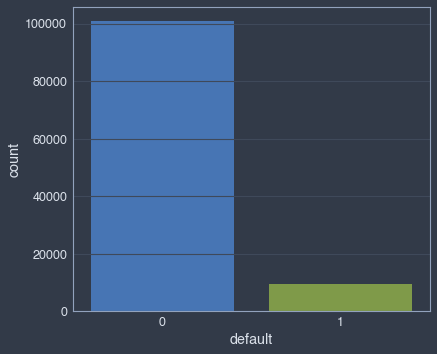

In [8]:
sns.countplot(x='default', data=data)

Клиентов без дефолта в трейне 6 раз больше, можно сказать, что выборка несбалансированна. 

In [9]:
data.isna().sum()

client_id             0
app_date              0
education           478
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
sample                0
default               0
dtype: int64

## Подготовка признаков

client_id - идентификатор клиента

**education** - уровень образования

**sex** - пол заемщика

**age** - возраст заемщика

**car** - флаг наличия автомобиля

**car_type** - флаг автомобиля иномарки

**decline_app_cnt** - количество отказанных прошлых заявок

**good_work** - флаг наличия “хорошей” работы

**bki_request_cnt** - количество запросов в БКИ

**home_address** - категоризатор домашнего адреса

**work_address** - категоризатор рабочего адреса

**income** - доход заемщика

**foreign_passport** - наличие загранпаспорта

**sna** - связь заемщика с клиентами банка

**first_time** - давность наличия информации о заемщике

**score_bki** - скоринговый балл по данным из БКИ

**region_rating** - рейтинг региона

app_date - дата подачи заявки

default - флаг дефолта по кредиту

### Признак app_date

In [10]:
data.app_date = pd.to_datetime(data.app_date, format='%d%b%Y')

Распределение default по дням недели

<AxesSubplot:xlabel='app_date', ylabel='default'>

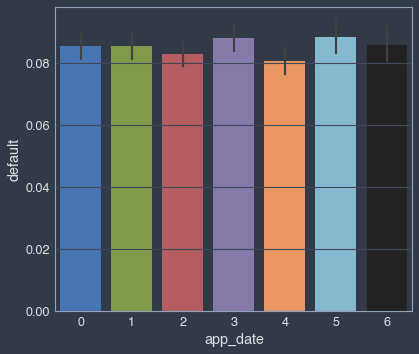

In [11]:
sns.barplot(data=data, x=data['app_date'].dt.weekday, y='default')

По дням распределение равномерное, рассмторю по месяцам

<AxesSubplot:xlabel='app_date', ylabel='default'>

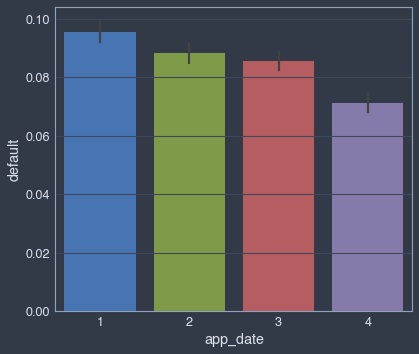

In [12]:
sns.barplot(data=data, x=data['app_date'].dt.month, y='default')

Оценю количество поданных заявок по месяцам

Text(0, 0.5, 'Number of Applications')

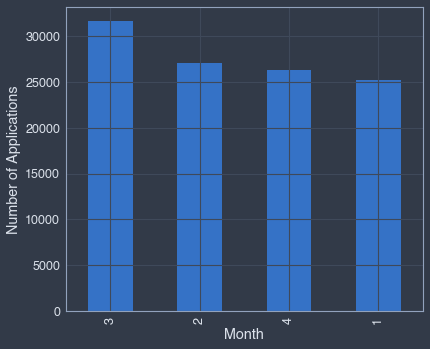

In [13]:
data['app_date'].dt.month.value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Applications')

Число заявок несколько отличается, добавлю новый признак - месяц, и удалю столбец app_date

In [14]:
data['app_month'] = data['app_date'].dt.month
data = data.drop('app_date', axis=1)

Сгруппирую признаки по типам

In [15]:
bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']
cat_cols = ['education', 'home_address', 'work_address', 'sna', 'first_time', 'region_rating', 'app_month']
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki']

### Числовые признаки
    num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki']

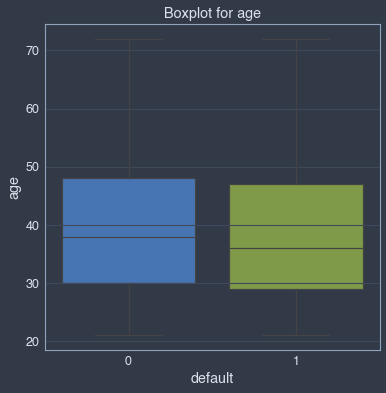

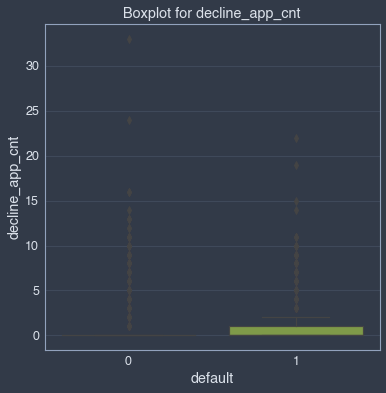

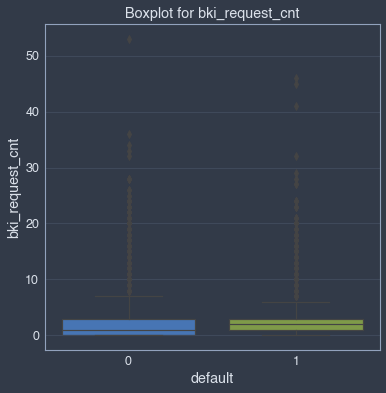

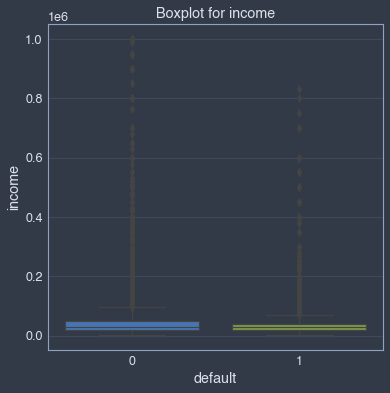

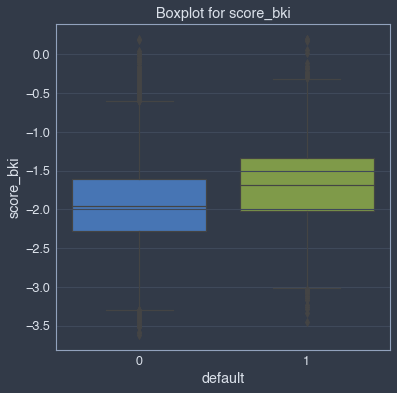

In [16]:
for col in num_cols: 
    get_boxplot(col)

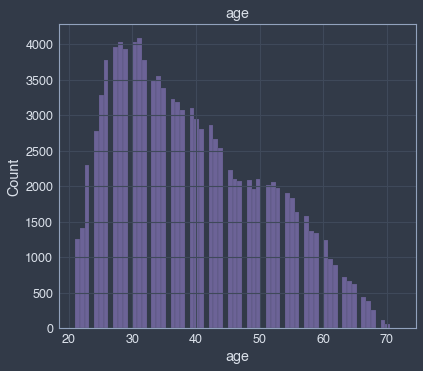

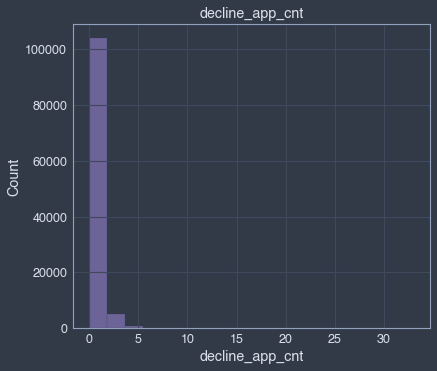

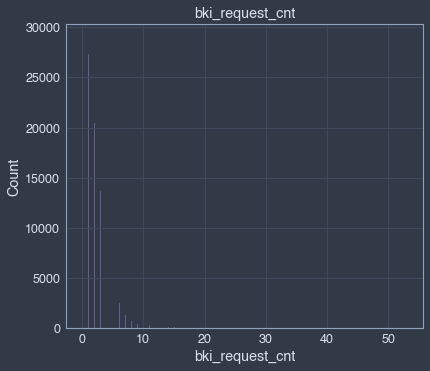

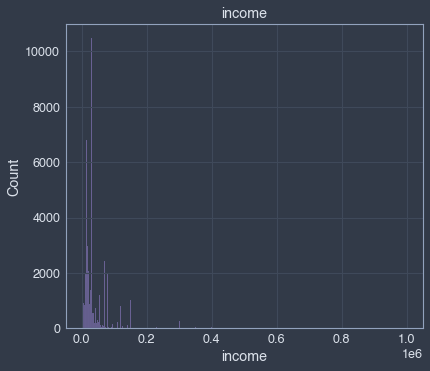

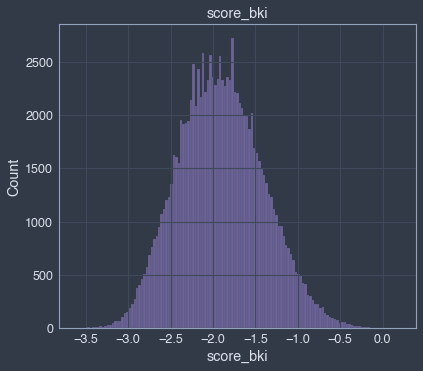

In [17]:
for i in num_cols:
    plt.figure()
    sns.histplot(data[i].dropna(), kde = False, color = 'm')
    plt.title(i)
    plt.show()

Логарифмирую числовые признаки чтобы привести распределение к нормальному (за исключением score_bki, который уже распределен нормально)

In [18]:
for i in ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']:
    data[i] = data[i].apply(lambda x: np.log(x + 1))

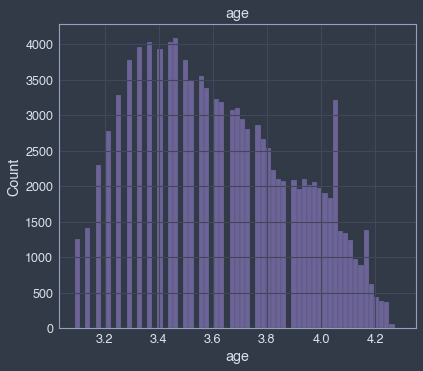

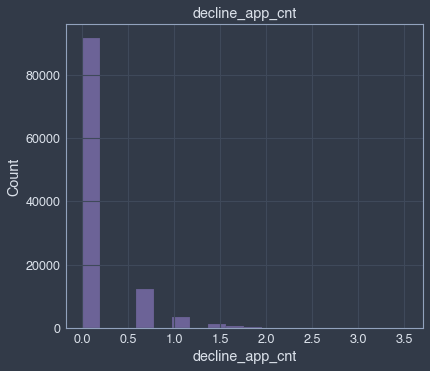

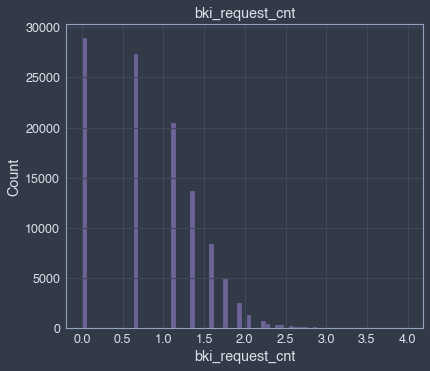

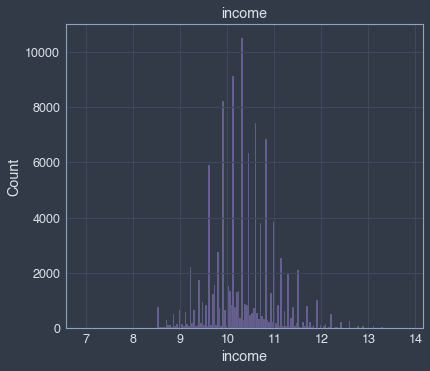

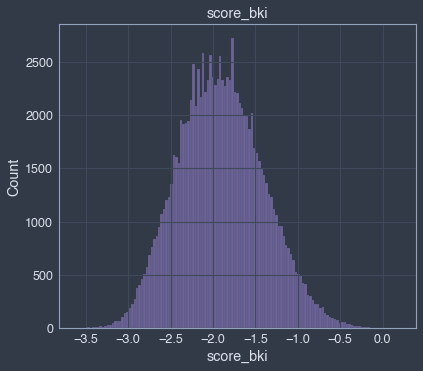

In [19]:
for i in num_cols:
    plt.figure()
    sns.histplot(data[i].dropna(), kde = False, color = 'm')
    plt.title(i)
    plt.show()

Оценка корреляции Пирсона

<AxesSubplot:>

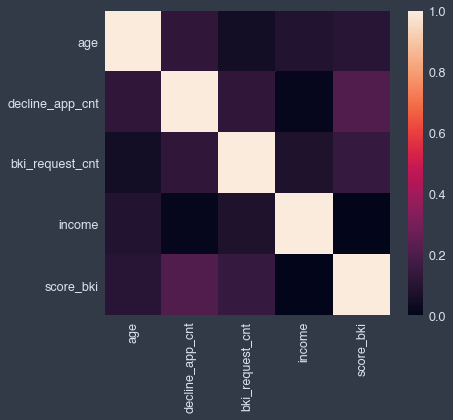

In [20]:
sns.heatmap(data[num_cols].corr().abs(), vmin=0, vmax=1)

Признаки между собой почти не коррелируют. 

Оценка значимости

<AxesSubplot:>

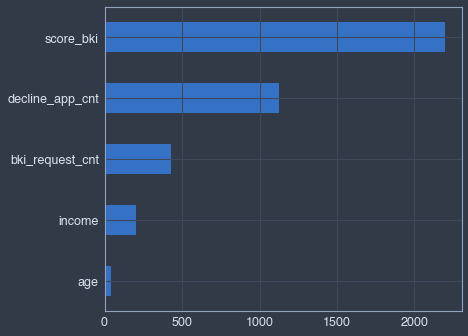

In [21]:
imp_num = Series(f_classif(data[num_cols], data['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [22]:
X_num = StandardScaler().fit_transform(data[num_cols].values)

### Бинарные признаки
    bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']

Бинарные признаки привожу к значениям 0 / 1 

In [23]:
label_encoder = LabelEncoder()
for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])
    print(dict(enumerate(label_encoder.classes_)))
train.head()

{0: 'F', 1: 'M'}
{0: 'N', 1: 'Y'}
{0: 'N', 1: 'Y'}
{0: 'N', 1: 'Y'}
{0: 0, 1: 1}


,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,sample
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0,1
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0,1
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0,1
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0,1
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0,1


### Категориальные признаки
    cat_cols = ['education', 'home_address', 'work_address', 'sna', 'first_time', 'region_rating', 'app_month']

<AxesSubplot:>

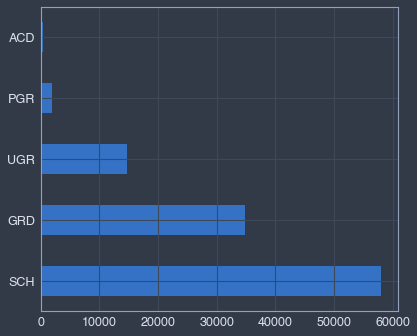

In [24]:
data['education'].value_counts().plot.barh()

Заполню пропуски в education наиболее часто встречающимся значением (их совсем немного)

In [26]:
data['education'] = data['education'].fillna(data['education'].mode()[0])

In [27]:
label_encoder.fit(data['education'])
data['education'] = label_encoder.transform(data['education'])
print(dict(enumerate(label_encoder.classes_)))

{0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR'}


<AxesSubplot:>

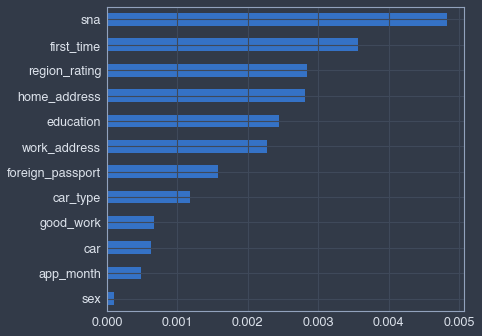

In [29]:
imp_cat = Series(mutual_info_classif(data[bin_cols + cat_cols], data['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Создам бинарные переменные для каждой категории

In [30]:
X_cat = OneHotEncoder(sparse = False).fit_transform(data[cat_cols].values)

In [31]:
X_cat.shape

(110148, 30)

## Объединение признаков и обучение модели

In [33]:
train_df = data.query('sample == 1').drop(['sample','client_id'], axis=1)
test_df = data.query('sample == 0').drop(['sample','client_id'], axis=1)

In [34]:
X = train_df.drop(['default'], axis=1).values
y = train_df['default'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

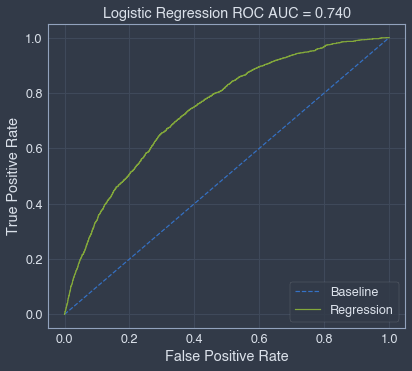

In [37]:
y_pred_probs = model.predict_proba(X_valid)[:,1]
roc_auc_curve(y_valid, y_pred_probs)

In [40]:
print('accuracy_score:',accuracy_score(y_valid,y_pred))
print('precision_score:',precision_score(y_valid,y_pred))
print('recall_score:',recall_score(y_valid,y_pred))
print('f1_score:',f1_score(y_valid,y_pred))

accuracy_score: 0.875
precision_score: 0.40816326530612246
recall_score: 0.021893814997263273
f1_score: 0.04155844155844156


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

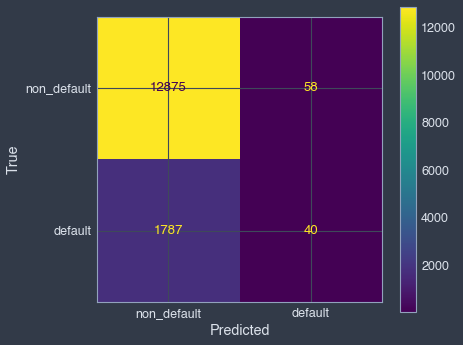

In [43]:
cm = confusion_matrix(y_valid, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['non_default','default'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

Высокая ошибка I рода - модель одобряет большое количество дефолтных клиентов

## Регуляризация

Использую RandomizedSearchCV

In [62]:
train_df = data.query('sample == 1').drop(['sample','client_id'], axis=1)
test_df = data.query('sample == 0').drop(['sample','client_id'], axis=1)
X = train_df.drop(['default'], axis=1).values
y = train_df['default'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

In [63]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [64]:
tree = DecisionTreeClassifier()

In [65]:
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

In [66]:
model_2 = tree_cv.fit(X_train, y_train)

In [67]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Результат: {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1}
Результат: 0.87220311982488


Обучение с параметрами

In [68]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=3, max_features=7, min_samples_leaf=5)

In [69]:
model_2 = tree.fit(X_train, y_train)

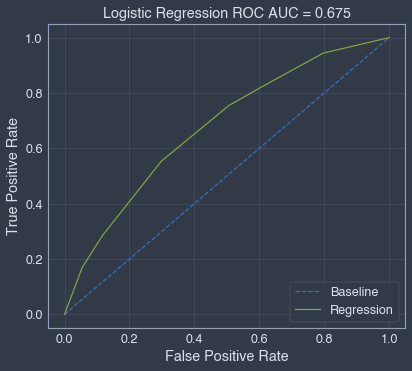

In [72]:
y_pred_probs = model_2.predict_proba(X_valid)[:,1]
roc_auc_curve(y_valid, y_pred_probs)

In [71]:
print('accuracy_score:',accuracy_score(y_valid,y_pred))
print('precision_score:',precision_score(y_valid,y_pred))
print('recall_score:',recall_score(y_valid,y_pred))
print('f1_score:',f1_score(y_valid,y_pred))

accuracy_score: 0.875
precision_score: 0.40816326530612246
recall_score: 0.021893814997263273
f1_score: 0.04155844155844156


Использую GridSearchCV

In [73]:
iter_ = 15
epsilon_stop = 1e-3

param_grid = [
    {'penalty': ['l1'], 
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['l2'], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['none'], 
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
]

gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_

best_parameters = model.get_params()
for param_name in sorted(best_parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))

preds = model.predict(X_valid)

/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


	C: 1.0
	class_weight: 'balanced'
	dual: False
	fit_intercept: True
	intercept_scaling: 1
	l1_ratio: None
	max_iter: 15
	multi_class: 'ovr'
	n_jobs: None
	penalty: 'l2'
	random_state: None
	solver: 'sag'
	tol: 0.001
	verbose: 0
	warm_start: False


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [74]:
print('accuracy_score:',accuracy_score(y_valid,y_pred))
print('precision_score:',precision_score(y_valid,y_pred))
print('recall_score:',recall_score(y_valid,y_pred))
print('f1_score:',f1_score(y_valid,y_pred))

accuracy_score: 0.875
precision_score: 0.40816326530612246
recall_score: 0.021893814997263273
f1_score: 0.04155844155844156


In [75]:
best_model = LogisticRegression(random_state=42, C=1,  class_weight='balanced', dual=False, 
                            fit_intercept=True, intercept_scaling=1, l1_ratio=None, multi_class='ovr',
                             n_jobs=None, penalty='l2', solver='sag',tol=0.001, verbose=0, warm_start=False, max_iter=15)

best_model.fit(X_train, y_train)
y_pred_prob = best_model.predict_proba(X_valid)[:,1]
y_pred = best_model.predict(X_valid)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [76]:
y_pred_prob

array([0.68905349, 0.58033243, 0.41082365, ..., 0.51742333, 0.47512686,
       0.5304249 ])

In [77]:
print('accuracy_score:',accuracy_score(y_valid,y_pred))
print('precision_score:',precision_score(y_valid,y_pred))
print('recall_score:',recall_score(y_valid,y_pred))
print('f1_score:',f1_score(y_valid,y_pred))

accuracy_score: 0.6740514905149051
precision_score: 0.22783655600145933
recall_score: 0.6836343732895457
f1_score: 0.3417704200300999


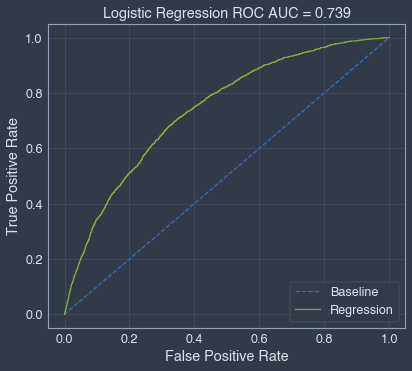

In [78]:
y_pred_probs = best_model.predict_proba(X_valid)[:,1]
roc_auc_curve(y_valid, y_pred_probs)

Метрики улучшились, поэтому оставлю эту модель

In [79]:
train_data = data.query('sample == 1').drop(['sample','client_id'], axis=1)
test_data = data.query('sample == 0').drop(['sample','client_id'], axis=1)

In [80]:
X_train = train_data.drop(['default'], axis=1)
y_train = train_data.default.values
X_test = test_data.drop(['default'], axis=1)

In [87]:
best_model.fit(X_train, y_train)
y_pred_prob = best_model.predict_proba(X_test)[:,1]
y_pred = best_model.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [88]:
submit = pd.DataFrame(test['client_id'])
submit['default']=y_pred_prob
submit.to_csv('submission.csv', index=False)

In [89]:
display(submit)

,client_id,default
0,74835,0.254809
1,17527,0.799078
2,75683,0.406725
3,26883,0.428905
4,28862,0.159704
...,...,...
36344,83775,0.786516
36345,106254,0.166113
36346,81852,0.831704
36347,1971,0.715162
